In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

Hat has numbers from 1 to n. Choose n:  100
Play game how many times?  15000


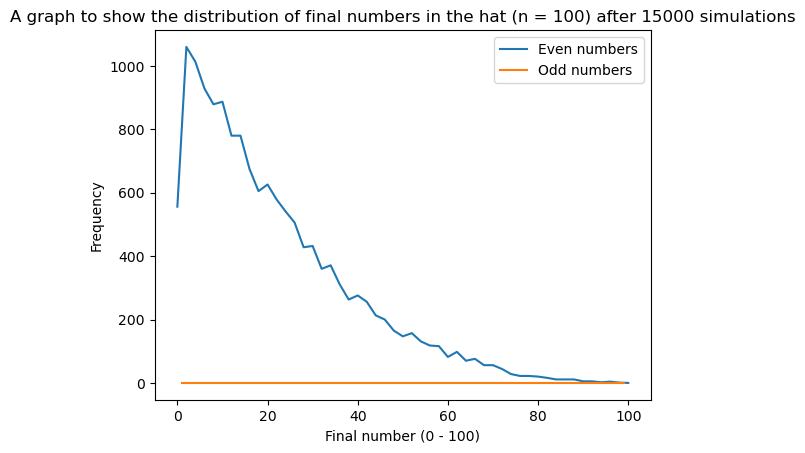

In [2]:
n = int(input('Hat has numbers from 1 to n. Choose n: ')) #choose how many numbers in bag
runs = int(input('Play game how many times? ')) #choose number of times to run (for graph)

finalVals = np.zeros((2, n+1)) #counter for each potential final number

for k in range(n + 1): #index the counter
    finalVals[0][k] = k

for i in range(0, runs):
    hat = np.arange(1, n+1) #create hat start point

    while len(hat) > 1: #repeats until 1 number left


        index1 = int(random.choice(np.arange(len(hat)))) #choose random position
        x = hat[index1] #find number in that position
        hat = np.delete(hat, index1) #delete because this number is being removed from hat

        index2 = int(random.choice(np.arange(len(hat)))) #choose random position
        y = hat[index2] #find number in that position
        hat = np.delete(hat, index2) #delete because this number is being removed from hat

        diff = np.abs(x - y)
        hat = np.append(hat, diff) #find difference and put it in the hat

        
    finalVals[1][hat[0]] += 1 #take the final number and increment the corresponding value in the counter array
    





#split the array of final values into even and odd (because only one of them has relevant data, depending on n)
if n%2 == 0:
    odd = np.zeros((2, int(n/2)))
    even = np.zeros((2, int(n/2 + 1)))
else:
    odd = np.zeros((2, int((n+1)/2)))
    even = np.zeros((2, int((n+1)/2)))

    
for j in range(n+1):
    if j%2 == 0:
        even[0][int(j/2)] = finalVals[0][j]
        even[1][int(j/2)] = finalVals[1][j]
    else:
        odd[0][int((j-1)/2)] = finalVals[0][j]
        odd[1][int((j-1)/2)] = finalVals[1][j]
            





#plot graph, (separating even and odd shows that final values only ever even OR odd for fixed n, never both)
plt.plot(even[0], even[1], label = 'Even numbers')
plt.plot(odd[0], odd[1], label = 'Odd numbers')
plt.title('A graph to show the distribution of final numbers in the hat (n = ' + str(n) + ') after ' + str(runs) + ' simulations')
plt.xlabel('Final number (0 - ' + str(n) + ')')
plt.ylabel('Frequency')
plt.legend()
plt.show()

    
